In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('SolarPrediction.csv')

In [ ]:
datos = datos.loc[:,['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']]

In [ ]:
datos.head(10)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62
5,1.21,48,30.46,64,120.20,5.62
6,1.20,49,30.46,72,112.45,6.75
7,1.24,49,30.46,71,122.97,5.62
8,1.23,49,30.46,80,101.18,4.50
9,1.21,49,30.46,85,141.87,4.50


In [ ]:
datos.dropna(axis=0,inplace=True)

In [ ]:
X = datos.drop('Radiation',axis=1)
Y = datos['Radiation']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_gs = MLPRegressor(max_iter=1000)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(1,10,10),(5,)],
    'activation': ['tanh', 'relu','logistic'],
    'alpha': [0.001, 0.01],
}

In [ ]:
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1)

clf.fit(X_train, y_train)

clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': MLPRegressor(max_iter=1000),
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 1000,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'n_jobs': -1,
 'param_grid': {'activation': ['tanh', 'relu', 'logistic'],
  'alpha': [0.001, 0.01],
  'hidden_layer_sizes': [(1, 10, 10), (5,)]},
 'pre_dispatch':

In [ ]:
y_pred_train_clf = clf.predict(X_train)
y_pred_clf = clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
r2_score(y_train,y_pred_train_clf)

0.6353300136974083

In [ ]:
r2_score(y_test, y_pred_clf)

0.645525380025014

In [ ]:
import matplotlib.pyplot as plt

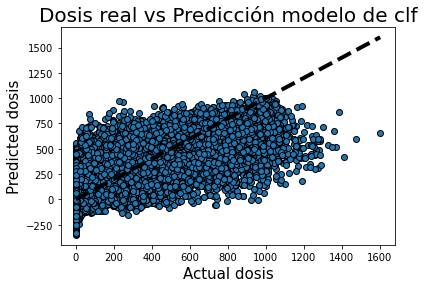

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train_clf, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Actual value',Fontsize=15)
ax.set_ylabel('Predicted value',Fontsize=15)
ax.set_title('Dosis real vs Predicción modelo de clf',Fontsize=20)
plt.show()

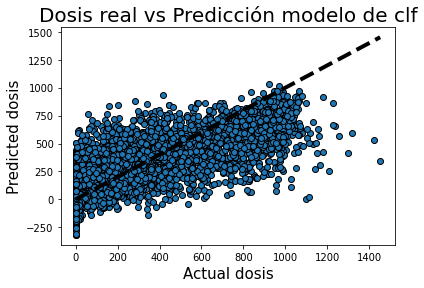

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_clf, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual dosis',Fontsize=15)
ax.set_ylabel('Predicted dosis',Fontsize=15)
ax.set_title('Dosis real vs Predicción modelo de clf',Fontsize=20)
plt.show()
